In [2]:
import FinanceDataReader as fdr
import numpy as np

ModuleNotFoundError: No module named 'FinanceDataReader'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### 전일변동폭

In [ ]:
# 변동성 돌파 전략 : 거래일의 현재가가 [시가 + 전일 변동폭*0.5]를 돌파할 때
# 매수하고 종가에 매도하는 전략
# 전일 변동폭 : 전일 고가 - 전일 저가

df = fdr.DataReader('229200') # 코스닥 150
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2015-10-01,10161,10161,10094,10101,31634,NaN
2015-10-02,10135,10159,10135,10148,63224,0.004653
2015-10-05,10255,10265,10210,10231,43154,0.008179
2015-10-06,10248,10274,10172,10176,42399,-0.005376
2015-10-07,10094,10094,9947,9949,21324,-0.022307
...,...,...,...,...,...,...
2024-10-17,12945,13010,12820,12900,3745163,-0.000775
2024-10-18,12890,12910,12570,12660,8569730,-0.018605
2024-10-21,12685,12895,12570,12870,8339814,0.016588


In [ ]:
df['변동'] = df['High'] - df['Low']
df['전일변동']=df['변동'].shift(1)
df['목표가'] = df['Open'] + df['전일변동'] * 0.5 # 0.5는 볼린져 밴드 느낌
df

,Open,High,Low,Close,Volume,Change,변동,전일변동,목표가
Date,,,,,,,,,
2015-10-01,10161,10161,10094,10101,31634,NaN,67,NaN,NaN
2015-10-02,10135,10159,10135,10148,63224,0.004653,24,67.0,10168.5
2015-10-05,10255,10265,10210,10231,43154,0.008179,55,24.0,10267.0
2015-10-06,10248,10274,10172,10176,42399,-0.005376,102,55.0,10275.5
2015-10-07,10094,10094,9947,9949,21324,-0.022307,147,102.0,10145.0
...,...,...,...,...,...,...,...,...,...
2024-10-17,12945,13010,12820,12900,3745163,-0.000775,190,120.0,13005.0
2024-10-18,12890,12910,12570,12660,8569730,-0.018605,340,190.0,12985.0
2024-10-21,12685,12895,12570,12870,8339814,0.016588,325,340.0,12855.0


In [ ]:
# 거래일의 고가가 목표가보다 크거나 같다면 그 목표가에서 매수
# 만약 매수가 일어나지 않으면 그대로 유지되므로 그날의 수익률은 1이 된다.

df['수익률'] = np.where(df['High'] >= df['목표가'], df['Close']/df['목표가'],1)
# 만약, 고가가 목표가보다 크거나 간다면 Close/ 목표가로 계산하고 아니면, 1로 계산해라 하는 코드의 뜻

df['누적수익률'] = df['수익률'].cumprod() # 약 2.7배
df

,Open,High,Low,Close,Volume,Change,변동,전일변동,목표가,수익률,누적수익률
Date,,,,,,,,,,,
2015-10-01,10161,10161,10094,10101,31634,NaN,67,NaN,NaN,1.000000,1.000000
2015-10-02,10135,10159,10135,10148,63224,0.004653,24,67.0,10168.5,1.000000,1.000000
2015-10-05,10255,10265,10210,10231,43154,0.008179,55,24.0,10267.0,1.000000,1.000000
2015-10-06,10248,10274,10172,10176,42399,-0.005376,102,55.0,10275.5,1.000000,1.000000
2015-10-07,10094,10094,9947,9949,21324,-0.022307,147,102.0,10145.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2024-10-17,12945,13010,12820,12900,3745163,-0.000775,190,120.0,13005.0,0.991926,2.742331
2024-10-18,12890,12910,12570,12660,8569730,-0.018605,340,190.0,12985.0,1.000000,2.742331
2024-10-21,12685,12895,12570,12870,8339814,0.016588,325,340.0,12855.0,1.001167,2.745531


##### 연평균 수익률

In [ ]:
delta = df.index[-1] - df.index[0]
year=delta.days / 365
year

CAGR = df['누적수익률'].iloc[-1] ** (1/year) -1 #연평균 11.7% 수익률이 있다
CAGR

0.11781044437645649

##### 변동성 돌파 전략 > 단순 보유 보다 좋은지 비교

In [ ]:
pip install koreanize-matplotlib

   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/7.9 MB 1.1 MB/s eta 0:00:08
   -- ------------------------------------- 0.6/7.9 MB 5.8 MB/s eta 0:00:02
   ---------- ----------------------------- 2.0/7.9 MB 14.3 MB/s eta 0:00:01
   ---------------- ----------------------- 3.3/7.9 MB 19.3 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/7.9 MB 23.9 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/7.9 MB 23.9 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/7.9 MB 23.9 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/7.9 MB 15.3 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/7.9 MB 16.7 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/7.9 MB 16.7 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/7.9 MB 16.7 MB/s eta 0:00:01
   --------------

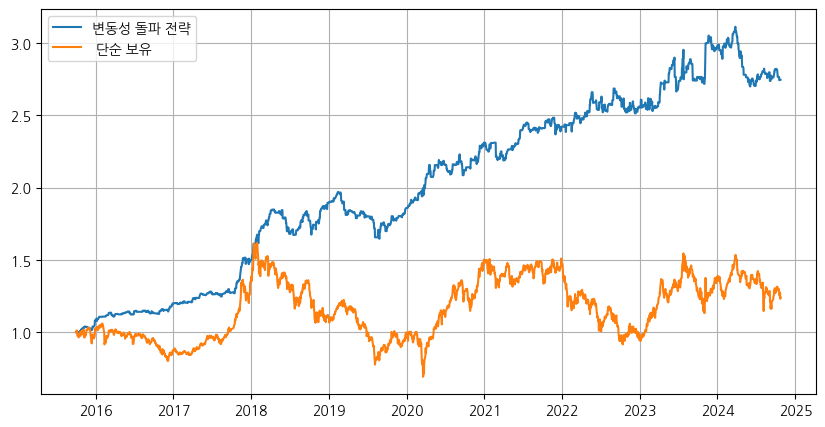

In [ ]:
# 변동성 돌파 전략 > 단순 보유 보다 좋아야함
import matplotlib.pyplot as plt
import koreanize_matplotlib # 폰트 한글로 설정

plt.figure(figsize= (10,5))
plt.plot(df['누적수익률'])
plt.plot(df['Close']/df['Close'].iloc[0])
plt.grid()
plt.legend(['변동성 돌파 전략',' 단순 보유'])
plt.show()

##### 위험도 확인

In [ ]:
df['전고점'] = df['누적수익률'].cummax() # 자산의 이전 최고 가격

# 현재 시점에서 몇 퍼센트정도 하락했는지 확인
df['DD'] = (1-df['누적수익률']/df['전고점']) * 100 # 낙점 컬럼
df['DD'].max() # 최대 낙폭 M DD

16.417571317332424

##### 마켓 타이밍 : 하락 구간일땐 무시하고 상승 구간에서만 투자

- 10일 이동평균선 위에 있을 때만 투자한다고 가정

In [ ]:
df['MA10']=df['Close'].rolling(window = 10).mean()


# 시가가 전날 이동 평균선 위에 있을 때 매매
df['매매신호'] =df['Open'] > df['MA10'].shift(1)


df['수익률2'] = np.where((df['매매신호']==1 ) & (df['High']>=df['목표가'])
                      ,df['Close']/df['목표가'], 1)

df['누적수익률2'] = df['수익률2'].cumprod()
df['누적수익률2'].iloc[-1] # 1.56배 수익률은 낮아졌지만 MDD(낙폭)이 어떤지 확인 해봐야함


1.5666715786156653

In [ ]:
df['전고점2'] = df['누적수익률2'].cummax()
df['DD2'] = (1 - df['누적수익률2'] / df['전고점2']) *100
df['DD2'].max() # MDD(위험도) : 14

14.367365943377418

#### ETF

- 각 종목으로 나뉘어 있는것 보다 좋음
- ETF : 여러개 종목을 묶어 놓은 것

In [3]:
import os
import pandas as pd
from tqdm import tqdm
# RSI : 상대강도지수(0~100)
# 금융 시장에서 주식이나 다른 자산의 과매수 또는 과매도 상태를 파악하기 위해 사용하는 기술
# 표준화를 안해도되서 RSI를 사용하는 것이 좋음

X = []
Y = []

window = 100

#LINE으로 보내기까지
for i in tqdm(os.listdir('/content/drive/MyDrive/iMbank_ML,DL실습/금융데이터분석/금융분석_1023/ETFs')):
    name = i.split('.')[0]
    df = pd.read_csv('/content/drive/MyDrive/iMbank_ML,DL실습/금융데이터분석/금융분석_1023/ETFs/' + i)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    # print(df)

    data = df[['Change','RSI','Close']].values # 최대한 표준화된 데이터만 사용 Tip임 , valuse 사용하여 빠르게
    # print(data)

    for j in range(len(data) - window):
        try:
            a = data[j :j+window, :-1].flatten()
            b= int(data[j+window-1,-1]*1.02 < data[j+window, -1])

             # try 하는 이유 만약, 10개의 데이터 밖에 없다면 오류가 나기 때문

            #a = data.iloc[j : j + window][['Change','RSI']].to_numpy().flatten() # 문제집 만들기
            # flatten()은 2차원 배열을 1차원 배열로 변환하여, 데이터를 간편하게 다룰 수 있도록 하는 기능입니다.
            # print(a)
            #b = int(data.iloc[j+window -1]['Close'] * 1.05 < data.iloc[j + window]['Close'])# 문제집의 가장 마지막 값보다 5센트 종가가 올랐는게 정답지
            # j+window -1 문제집의 마지막 값의 가격의 5% 오른값보다 다음날 가격이 크다면
            #print(b)

        except:
            continue
        X.append(a)
        Y.append(b)


100%|██████████| 792/792 [00:18<00:00, 43.42it/s]


In [4]:
len(X),len(Y)

(842101, 842101)

In [5]:
pip install xgboost

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

train_x, test_x, train_y, test_y = train_test_split(X,Y)

model = XGBClassifier()

model.fit(train_x,train_y)

pred = model.predict(test_x)

report = classification_report(test_y,pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    200326
           1       0.76      0.20      0.32     10200

    accuracy                           0.96    210526
   macro avg       0.86      0.60      0.65    210526
weighted avg       0.95      0.96      0.95    210526



In [7]:
model.fit(X,Y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [8]:
#LINE으로 보내기까지

total = []
for i in os.listdir('/content/drive/MyDrive/iMbank_ML,DL실습/금융데이터분석/금융분석_1023/ETFs'):
    name = i.split('.')[0]
    df = pd.read_csv('/content/drive/MyDrive/iMbank_ML,DL실습/금융데이터분석/금융분석_1023/ETFs/' + i)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.set_index('Date')
    # print(df)

    data = df[['Change','RSI','Close']]
    today_data = data.iloc[-window:][['Change','RSI']].to_numpy().flatten()
    try:
        pred = model.predict_proba([today_data])[0][1]
        if pred > 0.7 :
            total.append([name,pred])
            #print(name)
    except:
        continue


In [9]:
total

[['TIGER AI반도체핵심공정', 0.7299916]]

In [10]:
from datetime import datetime
today=str(datetime.today().date())

t = f'{today} 기준 종목 예측 \n\n'

for i in total:
    t +=f'추천종목 : {i[0]} ({i[1]:.2f})\n'

print(t)

2024-10-23 기준 종목 예측 

추천종목 : TIGER AI반도체핵심공정 (0.73)



In [35]:
!pip install line_notify

  Preparing metadata (setup.py) ... done
  Created wheel for line_notify: filename=line_notify-0.1.4-py3-none-any.whl size=2655 sha256=2517fb4461222580342552de05e9b624ad512318478665a6f5bb5b04e9b1a6c6
  Stored in directory: /root/.cache/pip/wheels/67/6c/44/d1d7f01e440da6453d2b5f1e781cc9089af69867bbc4f3d795
Successfully built line_notify


In [11]:
from line_notify import LineNotify

my_key = "라인 토큰 키"
my_line = LineNotify(my_key)
my_line.send(t)

In [12]:
print(t)

2024-10-23 기준 종목 예측 

추천종목 : TIGER AI반도체핵심공정 (0.73)



In [14]:
!pip install openai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.4 MB/s eta 0:00:00


In [16]:
from openai import OpenAI

AI=OpenAI(api_key = '오픈 API 키')

box = [{'role' : 'system', 'content': '내가 글을 보여주면 그 글 내용을 블로그에 올릴 수 있게 작성해주십시오'},
     {'role':'user','content':t}]

model=AI.chat.completions.create(model='gpt-4o',messages=box)



In [17]:
my_line.send(model.choices[0].message.content)

In [18]:
t =model.choices[0].message.content
print(t)

### 2024년 10월 23일 주식 시장 종목 예측

주식 시장은 항상 변화무쌍하며, 투자자들은 최신 정보를 기반으로 신중한 결정을 내려야 합니다. 2024년 10월 23일 기준으로 주목할 만한 추천 종목으로 **TIGER AI반도체핵심공정**을 소개합니다. 이 종목은 최근 여러 요인에서 긍정적인 평가를 받고 있으며, 투자자들의 관심이 집중되고 있는 상황입니다.

#### 추천 종목: TIGER AI반도체핵심공정
- **추천 점수**: 0.73

#### 투자 포인트:
1. **산업 성장 가능성**: 반도체 산업은 AI 및 첨단 기술의 발전과 함께 꾸준한 성장을 이어가고 있습니다. 특히, 핵심 공정에 대한 수요가 증가하면서 시장에서의 중요성도 부각되고 있습니다.

2. **기술 혁신**: 이 종목은 AI와 반도체 기술의 융합을 통해 혁신적인 솔루션을 제공, 업계에서 차별화된 경쟁력을 갖추고 있습니다.

3. **글로벌 시장 확장**: 글로벌 시장에 대한 적극적인 확장 전략으로, 다양한 지역에서의 매출 증가가 기대됩니다. 반도체 핵심 공정의 수요는 전 세계적으로 확대되고 있습니다.

4. **재무 안정성**: 최근 재무보고서에 따르면, 안정적인 수익 구조와 건전한 재무 상태를 보여주고 있어 장기적인 관점에서도 긍정적입니다.

#### 결론:
TIGER AI반도체핵심공정은 기술 혁신과 산업 성장 가능성을 고려할 때 미래가 유망한 투자 대상으로 보입니다. 물론, 개별적인 투자 결정을 내릴 때는 철저한 시장 조사와 자신의 투자 목표 및 리스크 관리 전략을 수립하는 것이 중요합니다. 다양한 변수들을 고려하여 현명한 투자 결정을 내리시기 바랍니다.

**주의사항**: 주식 투자는 원금 손실의 위험이 있으므로, 충분한 정보를 통한 신중한 접근이 필요합니다. 개인의 투자 성향과 목적에 맞는 전략적 판단이 강조됩니다.
